In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [15]:
data=pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
dt=data.drop(columns='Unnamed: 32')

In [ ]:
dt['diagnosis']=dt['diagnosis'].map({'M':1,'B':0})


In [19]:
x=dt.drop(columns='diagnosis')
y=dt['diagnosis']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [21]:
scaler=StandardScaler()
x_train_normalized=scaler.fit_transform(x_train)
x_test_normalized=scaler.fit_transform(x_test)

In [23]:
model=tf.keras.models.Sequential()
model.add(Input(shape=(x_train_normalized.shape[1],)))
model.add(Dense(units=20,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=10,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop=EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)
model.fit(x_train_normalized,y_train,epochs=1000,validation_split=0.2,callbacks=[early_stop])

Epoch 1/1000


2025-01-18 20:55:22.429462: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6683 - loss: 0.6905 - val_accuracy: 0.9670 - val_loss: 0.6771
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9071 - loss: 0.6706 - val_accuracy: 0.9670 - val_loss: 0.6430
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9218 - loss: 0.6254 - val_accuracy: 0.9670 - val_loss: 0.5858
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9301 - loss: 0.5498 - val_accuracy: 0.9670 - val_loss: 0.5070
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9443 - loss: 0.4841 - val_accuracy: 0.9780 - val_loss: 0.4233
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9535 - loss: 0.4026 - val_accuracy: 0.9780 - val_loss: 0.3390
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9530 - loss: 0.3219 - val_accuracy: 0.9780 - val_loss: 0.2667
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9533 - loss: 0.2678 - val_accuracy: 0.9780 

In [25]:
evaluation_results=model.evaluate(x_train_normalized,y_train)
print(f"Loss:{evaluation_results[0]}")
print(f"Accuracy:{evaluation_results[1]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0034
Loss:0.003361231880262494
Accuracy:1.0


In [26]:
evaluation_results=model.evaluate(x_test_normalized,y_test)
print(f"Loss:{evaluation_results[0]}")
print(f"Accuracy:{evaluation_results[1]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9707 - loss: 0.2365
Loss:0.24633775651454926
Accuracy:0.9736841917037964


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


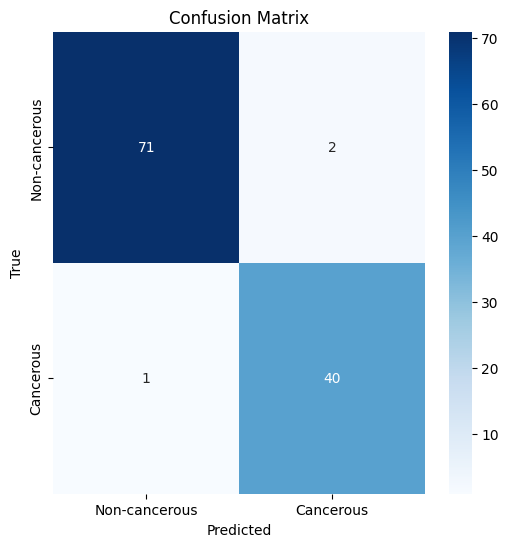

In [27]:
y_pred=model.predict(x_test_normalized)
y_pred_class=(y_pred>0.5).astype("int32")
cm=confusion_matrix(y_test,y_pred_class)

plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Non-cancerous','Cancerous'],yticklabels=['Non-cancerous','Cancerous'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
y_pred=model.predict(x_test_normalized)
y_pred_class=(y_pred>0.5).astype("int32")

test_data_df=pd.DataFrame(x_test,columns=dt.columns[:-1])
test_data_df['Predicted']=y_pred_class
test_data_df['diagnosis']=y_test

def highlight_cancerous(row):
    if row['Predicted']==1:
        return ['background-color: red']*len(row)
    else:
        return ['background-color: green']*len(row)
    
styled_df=test_data_df.style.apply(highlight_cancerous,axis=1)
styled_df

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,Predicted
317,894326,1,18.220000,18.870000,118.700000,1027.000000,0.097460,0.111700,0.113000,0.079500,0.180700,0.056640,0.404100,0.550300,2.547000,48.900000,0.004821,0.016590,0.024080,0.011430,0.012750,0.002451,21.840000,25.000000,140.900000,1485.000000,0.143400,0.276300,0.385300,0.177600,0.281200,1
129,866674,1,19.790000,25.120000,130.400000,1192.000000,0.101500,0.158900,0.254500,0.114900,0.220200,0.061130,0.495300,1.199000,2.765000,63.330000,0.005033,0.031790,0.047550,0.010430,0.015780,0.003224,22.630000,33.580000,148.700000,1589.000000,0.127500,0.386100,0.567300,0.173200,0.330500,1
115,864685,0,11.930000,21.530000,76.530000,438.600000,0.097680,0.078490,0.033280,0.020080,0.168800,0.061940,0.311800,0.922700,2.000000,24.790000,0.007803,0.025070,0.018350,0.007711,0.012780,0.003856,13.670000,26.150000,87.540000,583.000000,0.150000,0.239900,0.150300,0.072470,0.243800,0
371,9012568,0,15.190000,13.210000,97.650000,711.800000,0.079630,0.069340,0.033930,0.026570,0.172100,0.055440,0.178300,0.412500,1.338000,17.720000,0.005012,0.014850,0.015510,0.009155,0.016470,0.001767,16.200000,15.730000,104.500000,819.100000,0.112600,0.173700,0.136200,0.081780,0.248700,0
39,855138,1,13.480000,20.820000,88.400000,559.200000,0.101600,0.125500,0.106300,0.054390,0.172000,0.064190,0.213000,0.591400,1.545000,18.520000,0.005367,0.022390,0.030490,0.012620,0.013770,0.003187,15.530000,26.020000,107.300000,740.400000,0.161000,0.422500,0.503000,0.225800,0.280700,1
375,901303,0,16.170000,16.070000,106.300000,788.500000,0.098800,0.143800,0.066510,0.053970,0.199000,0.065720,0.174500,0.489000,1.349000,14.910000,0.004510,0.018120,0.019510,0.011960,0.019340,0.003696,16.970000,19.140000,113.100000,861.500000,0.123500,0.255000,0.211400,0.125100,0.315300,0
378,9013594,0,13.660000,15.150000,88.270000,580.600000,0.082680,0.075480,0.042490,0.024710,0.179200,0.058970,0.140200,0.541700,1.101000,11.350000,0.005212,0.029840,0.024430,0.008356,0.018180,0.004868,14.540000,19.640000,97.960000,657.000000,0.127500,0.310400,0.256900,0.105400,0.338700,0
154,8711002,0,13.150000,15.340000,85.310000,538.900000,0.093840,0.084980,0.092930,0.034830,0.182200,0.062070,0.271000,0.792700,1.819000,22.790000,0.008584,0.020170,0.030470,0.009536,0.027690,0.003479,14.770000,20.500000,97.670000,677.300000,0.147800,0.225600,0.300900,0.097220,0.384900,0
423,906878,0,13.660000,19.130000,89.460000,575.300000,0.090570,0.114700,0.096570,0.048120,0.184800,0.061810,0.224400,0.895000,1.804000,19.360000,0.003980,0.028090,0.036690,0.012740,0.015810,0.003956,15.140000,25.500000,101.400000,708.800000,0.114700,0.316700,0.366000,0.140700,0.274400,0
291,8915,0,14.960000,19.100000,97.030000,687.300000,0.089920,0.098230,0.059400,0.048190,0.187900,0.058520,0.287700,0.948000,2.171000,24.870000,0.005332,0.021150,0.015360,0.011870,0.015220,0.002815,16.250000,26.190000,109.100000,809.800000,0.131300,0.303000,0.180400,0.148900,0.296200,1
